In [34]:
import scipy.linalg.lapack as la
import timeit
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import rc

import seaborn as sns

# Criando objeto para obter as soluções do tipo A*X = B pra os tipos de matrizes

In [76]:
#@title Objeto
class ExerciseMatrix:
    def __init__(self,n):
      self.n = n
      self.__matrix = np.zeros((self.n, self.n))
      
    def get_matrix(self):
      matrix = np.zeros((self.n, self.n))
      for i in range(self.n):
          matrix[i,i] = 2
          if(i != 0):
              matrix[i,i-1] = -1
          if(i != (self.n-1)):
              matrix[i,i+1] = -1
      memory = sys.getsizeof(matrix)/(2**20)
      return (matrix,memory)

    def get_band(self):
      kl = 1
      ku = 1
      row = 2 * kl + ku + 1
      matrix = np.zeros((row, self.n))
      for i in range(self.n):
          matrix[2, i] = 2
          if(i > 0):
              matrix[1, i] = -1

          if(i < self.n - 1):
              matrix[3, i] = -1
      memory = sys.getsizeof(matrix)/(2**20)
      return (matrix,memory)
    
    def get_band_sym(self):
      row = 2
      matrix = np.zeros((row, self.n))
      for i in range(self.n):
          matrix[1, i] = 2
          if(i > 0):
              matrix[0, i] = -1
      memory = sys.getsizeof(matrix)/(2**20)
      return (matrix,memory)
    
    def get_triagonal(self):
      dl = np.full(self.n - 1, -1)
      d = np.full(self.n, 2)
      du = dl
      memory = (sys.getsizeof(dl)+sys.getsizeof(d)+sys.getsizeof(du))/(2**20)
      return (dl, d, du, memory)
    
    def get_triagonal_sym(self):
      d = np.full(self.n, 2)
      e = np.full(self.n - 1, -1)
      memory = (sys.getsizeof(d) + sys.getsizeof(e))/(2**20)
      return (d, e, memory)

    def solve_dense(self):
      b = np.full((self.n,1),1)
      A, memory = self.get_matrix()
      start = timeit.default_timer()
      lub, piv, x, info = la.dgesv(A, b)
      stop = timeit.default_timer()
      return (x, stop-start,memory)

    def solve_dense_sym(self):
      b = np.full((self.n,1),1)
      A, memory = self.get_matrix()
      start = timeit.default_timer()
      c, x, info = la.dposv(A, b)
      stop = timeit.default_timer()
      return (x, stop-start,memory)

    def solve_band(self):
      kl = 1
      ku = 1
      b = np.ones((self.n,1))
      ab, memory = self.get_band()
      start = timeit.default_timer()
      lub, piv, x, info = la.dgbsv(kl, ku, ab, b)
      stop = timeit.default_timer()
      return (x, stop-start,memory)

    def solve_band_sym(self):
      b = np.ones((self.n,1))
      ab, memory = self.get_band_sym()
      start = timeit.default_timer()
      c, x, info = la.dpbsv(ab, b)
      stop = timeit.default_timer()
      return (x, stop-start,memory)

    def solve_triagonal(self):
      b = np.ones((self.n,1))
      dl, d, du, memory = self.get_triagonal()
      start = timeit.default_timer()
      du2, d, du, x, info = la.dgtsv(dl, d, du, b)
      stop = timeit.default_timer()
      return (x, stop-start,memory)

    def solve_triagonal_sym(self):
      b = np.ones((self.n,1))
      d, e, memory = self.get_triagonal_sym()
      start = timeit.default_timer()
      d, du, x, info = la.dptsv(d, e, b)
      stop = timeit.default_timer()
      return (x, stop-start,memory)

# Loop para várias dimensões

## Esquentando a cache

In [ ]:
lengths = np.arange(1000,31000,500)
# lengths = np.arange(500,2000,500)
data = pd.DataFrame(columns = ['matrix_type',
                               'dimension',
                               'memory_matrix_A',
                               'time_elapsed'])

#Função auxiliar
def add_data_row(data,typ,n,memory,time):
    data = data.append({'matrix_type': typ,
                      'dimension': int(n),
                      'memory_matrix_A': memory,
                      'time_elapsed': time},
                      ignore_index = True)
    return data

In [ ]:
for n in lengths:
    print(n)
    matrix = ExerciseMatrix(n)
    #Denso
    x, time, memory = matrix.solve_dense()
    del x
    data = add_data_row(data,'dense',n,memory,time)
    #Denso Simétrico
    x, time, memory = matrix.solve_dense_sym()
    del x
    data = add_data_row(data,'dense_sym',n,memory/2,time)
    #Banda
    x, time, memory = matrix.solve_band()
    del x
    data = add_data_row(data,'band',n,memory,time)
    #Banda Simétrico
    x, time, memory = matrix.solve_band_sym()
    del x
    data = add_data_row(data,'band_sym',n,memory,time)
    #Tridiagonal
    x, time, memory = matrix.solve_triagonal()
    del x
    data = add_data_row(data,'tridiagonal',n,memory,time)
    #Tridiagonal Simétrico
    x, time, memory = matrix.solve_triagonal_sym()
    del x
    data = add_data_row(data,'tridiagonal_sym',n,memory,time)


## Salvando os dados

In [ ]:
lengths = np.arange(1000,35500,500)
# lengths = np.arange(500,2000,500)
data = pd.DataFrame(columns = ['matrix_type',
                               'dimension',
                               'memory_matrix_A',
                               'time_elapsed'])

#Função auxiliar
def add_data_row(data,typ,n,memory,time):
    data = data.append({'matrix_type': typ,
                      'dimension': int(n),
                      'memory_matrix_A': memory,
                      'time_elapsed': time},
                      ignore_index = True)
    return data

In [ ]:
for n in lengths:
    print(n)
    matrix = ExerciseMatrix(n)
    #Denso
    x, time, memory = matrix.solve_dense()
    del x
    data = add_data_row(data,'dense',n,memory,time)
    #Denso Simétrico
    x, time, memory = matrix.solve_dense_sym()
    del x
    data = add_data_row(data,'dense_sym',n,memory/2,time)
    #Banda
    x, time, memory = matrix.solve_band()
    del x
    data = add_data_row(data,'band',n,memory,time)
    #Banda Simétrico
    x, time, memory = matrix.solve_band_sym()
    del x
    data = add_data_row(data,'band_sym',n,memory,time)
    #Tridiagonal
    x, time, memory = matrix.solve_triagonal()
    del x
    data = add_data_row(data,'tridiagonal',n,memory,time)
    #Tridiagonal Simétrico
    x, time, memory = matrix.solve_triagonal_sym()
    del x
    data = add_data_row(data,'tridiagonal_sym',n,memory,time)


In [ ]:
data.to_csv("exercise_lapack.csv")

# Gerando visualização

In [104]:
data = pd.read_csv("exercise_lapack.csv", index_col = 0)
img_dim = (25,8.5)

## Caso Denso

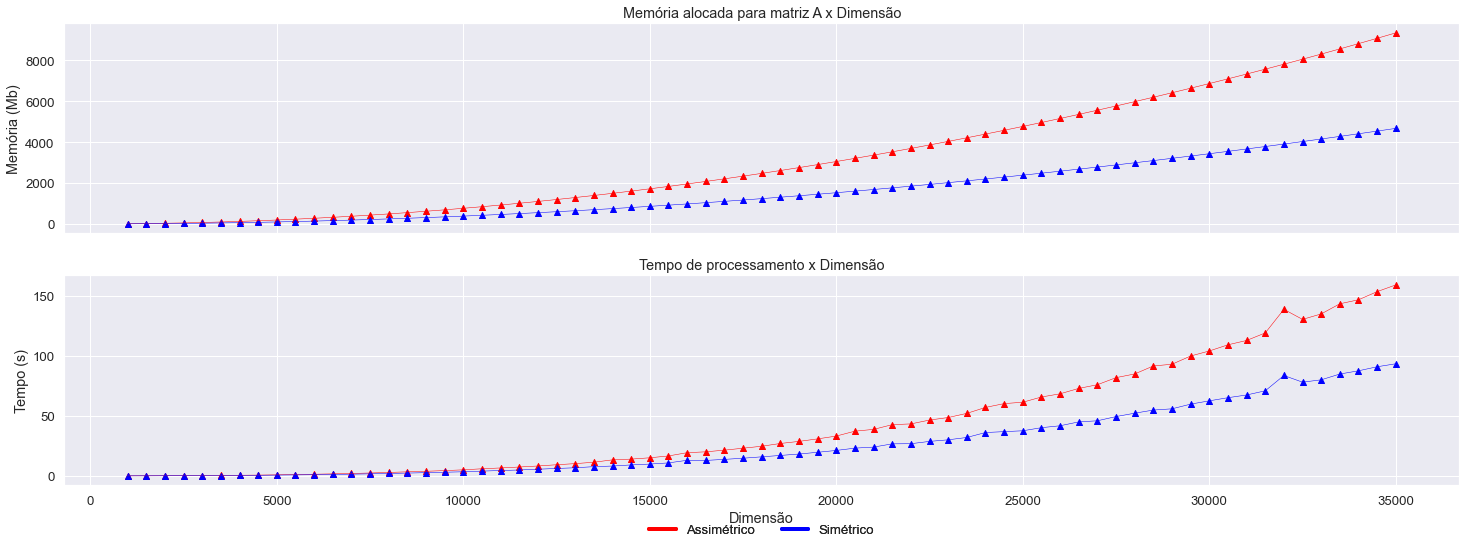

In [105]:
sns.set_theme(font_scale=1.2)
# rc('text', usetex=True)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = img_dim, sharex=True)
types = ['dense','dense_sym']
markers_char = ["^", "^", "h", "h", "s", "s"]
markers = dict(zip(types, markers_char))
colors = ['blue' if 'sym' in x else 'red' for x in types]
sym_colors = dict(zip(types, colors))
labels_clean = [t.replace("_sym", "") for t in types]
labels = dict(zip(types, labels_clean))


for t in types:
    data_aux = data[data['matrix_type'] == t]
    x = data_aux['dimension']
    y =  data_aux['memory_matrix_A']
    ax1.plot(x, y, c=sym_colors[t], linewidth=0.5)
    # ax1.scatter(x, y, c=sym_colors[t], marker=markers[t], label=labels[t])
    ax1.scatter(x, y, c=sym_colors[t], marker=markers[t])

ax1.set_title('Memória alocada para matriz A x Dimensão')
ax1.set_ylabel('Memória (Mb)')


for t in types:
    data_aux = data[data['matrix_type'] == t]
    x = data_aux['dimension']
    y =  data_aux['time_elapsed']
    ax2.plot(x, y, c=sym_colors[t], linewidth=0.5)
    # ax2.scatter(x, y, c=sym_colors[t], marker=markers[t], label=labels[t])
    ax2.scatter(x, y, c=sym_colors[t], marker=markers[t])

ax2.set_xlabel('Dimensão')
ax2.set_ylabel('Tempo (s)')
ax2.set_title('Tempo de processamento x Dimensão')

legend_elements_colors = [Line2D([0], [0], color="red", lw=4, label="Assimétrico"), Line2D([0], [0], color="blue", lw=4, label="Simétrico")]
legend1 = plt.legend(handles=legend_elements_colors, loc='lower center', ncol=3, frameon=False, bbox_to_anchor=(.5, -.30))

ax2.add_artist(legend1)


# plt.suptitle(f'Desempenho')
plt.show()

## Caso Banda

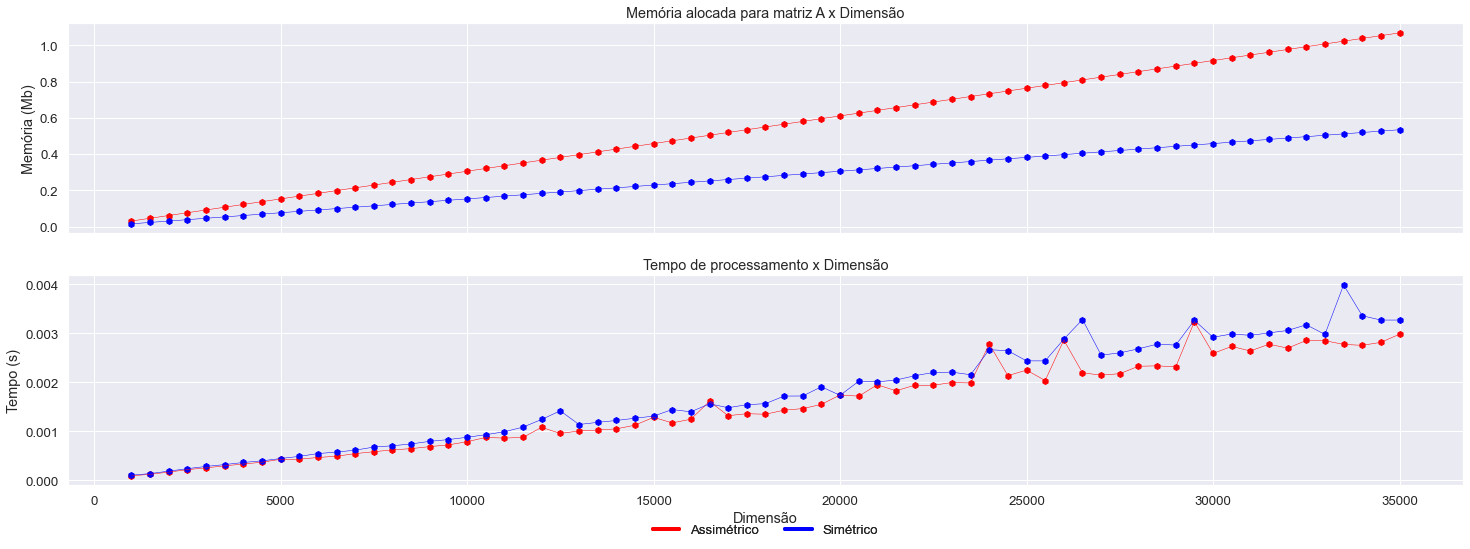

In [106]:
sns.set_theme(font_scale=1.2)
# rc('text', usetex=True)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = img_dim, sharex=True)
types = ["band","band_sym"]
markers_char = ["h", "h"]
markers = dict(zip(types, markers_char))
colors = ['blue' if 'sym' in x else 'red' for x in types]
sym_colors = dict(zip(types, colors))
labels_clean = [t.replace("_sym", "") for t in types]
labels = dict(zip(types, labels_clean))


for t in types:
    data_aux = data[data['matrix_type'] == t]
    x = data_aux['dimension']
    y =  data_aux['memory_matrix_A']
    ax1.plot(x, y, c=sym_colors[t], linewidth=0.5)
    # ax1.scatter(x, y, c=sym_colors[t], marker=markers[t], label=labels[t])
    ax1.scatter(x, y, c=sym_colors[t], marker=markers[t])

ax1.set_title('Memória alocada para matriz A x Dimensão')
ax1.set_ylabel('Memória (Mb)')

for t in types:
    data_aux = data[data['matrix_type'] == t]
    x = data_aux['dimension']
    y =  data_aux['time_elapsed']
    ax2.plot(x, y, c=sym_colors[t], linewidth=0.5)
    # ax2.scatter(x, y, c=sym_colors[t], marker=markers[t], label=labels[t])
    ax2.scatter(x, y, c=sym_colors[t], marker=markers[t])

ax2.set_xlabel('Dimensão')
ax2.set_ylabel('Tempo (s)')
ax2.set_title('Tempo de processamento x Dimensão')


legend_elements_colors = [Line2D([0], [0], color="red", lw=4, label="Assimétrico"), Line2D([0], [0], color="blue", lw=4, label="Simétrico")]
legend1 = plt.legend(handles=legend_elements_colors, loc='lower center', ncol=3, frameon=False, bbox_to_anchor=(.5, -.30))


ax2.add_artist(legend1)


# plt.suptitle(f'Desempenho')
plt.show()

## Caso Tridiagonal

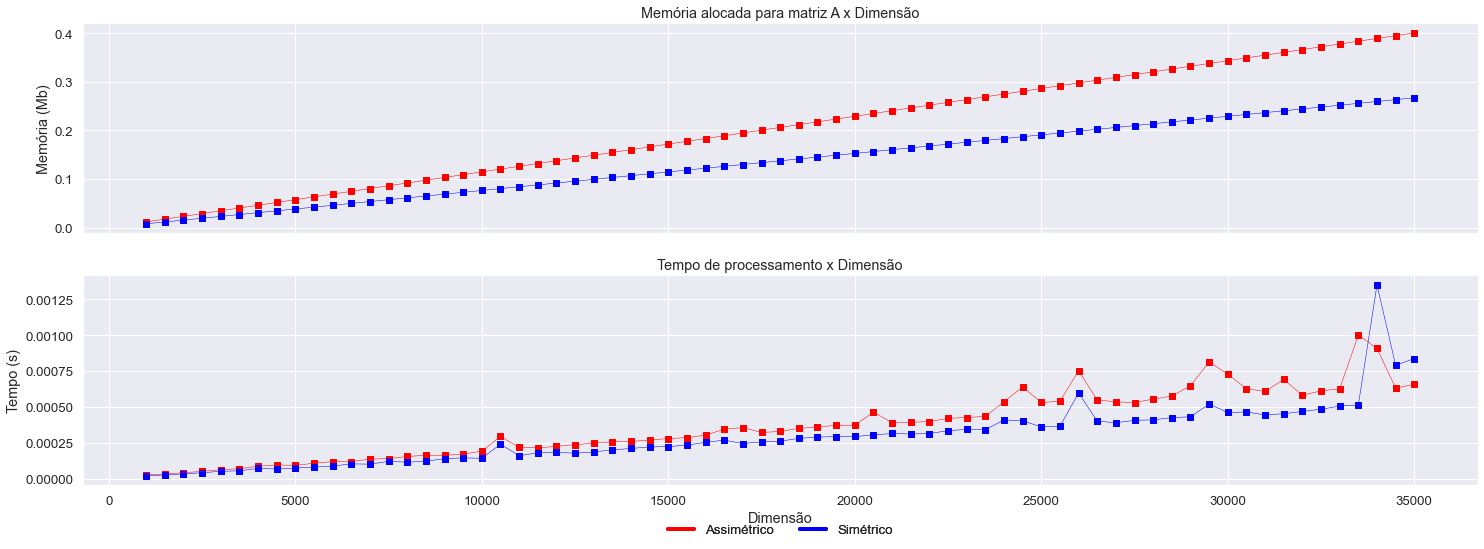

In [111]:
sns.set_theme(font_scale=1.2)
# rc('text', usetex=True)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = img_dim, sharex=True)
types = ['tridiagonal','tridiagonal_sym']
markers_char = ["s", "s"]
markers = dict(zip(types, markers_char))
colors = ['blue' if 'sym' in x else 'red' for x in types]
sym_colors = dict(zip(types, colors))
labels_clean = [t.replace("_sym", "") for t in types]
labels = dict(zip(types, labels_clean))


for t in types:
    data_aux = data[data['matrix_type'] == t]
    x = data_aux['dimension']
    y =  data_aux['memory_matrix_A']
    ax1.plot(x, y, c=sym_colors[t], linewidth=0.5)
    # ax1.scatter(x, y, c=sym_colors[t], marker=markers[t], label=labels[t])
    ax1.scatter(x, y, c=sym_colors[t], marker=markers[t])

ax1.set_title('Memória alocada para matriz A x Dimensão')
ax1.set_ylabel('Memória (Mb)')

for t in types:
    data_aux = data[data['matrix_type'] == t]
    x = data_aux['dimension']
    y =  data_aux['time_elapsed']
    ax2.plot(x, y, c=sym_colors[t], linewidth=0.5)
    # ax2.scatter(x, y, c=sym_colors[t], marker=markers[t], label=labels[t])
    ax2.scatter(x, y, c=sym_colors[t], marker=markers[t])

ax2.set_xlabel('Dimensão')
ax2.set_ylabel('Tempo (s)')
ax2.set_title('Tempo de processamento x Dimensão')


legend_elements_colors = [Line2D([0], [0], color="red", lw=4, label="Assimétrico"), Line2D([0], [0], color="blue", lw=4, label="Simétrico")]
legend1 = plt.legend(handles=legend_elements_colors, loc='lower center', ncol=3, frameon=False, bbox_to_anchor=(.5, -.30))

ax2.add_artist(legend1)

# plt.suptitle(f'Desempenho')
plt.show()

## Caso Geral

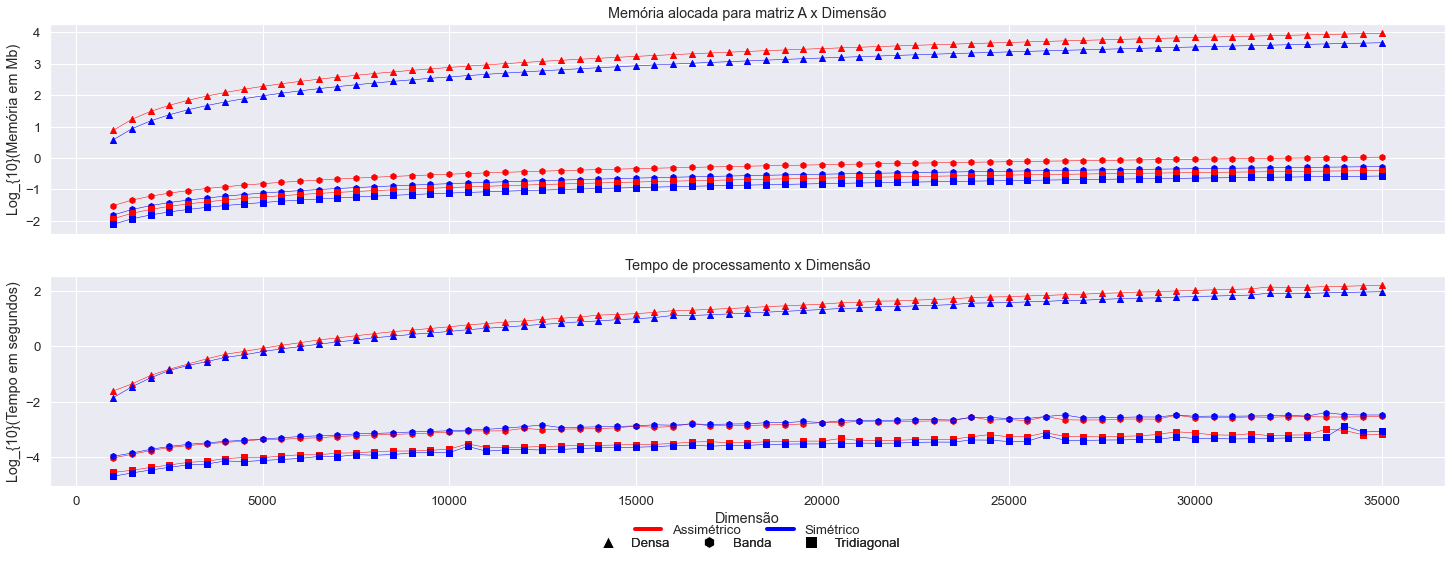

In [114]:
sns.set_theme(font_scale=1.2)
# rc('text', usetex=True)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = img_dim, sharex=True)
types = data['matrix_type'].unique()
markers_char = ["^", "^", "h", "h", "s", "s"]
markers = dict(zip(types, markers_char))
colors = ['blue' if 'sym' in x else 'red' for x in types]
sym_colors = dict(zip(types, colors))
labels_clean = [t.replace("_sym", "") for t in types]
labels = dict(zip(types, labels_clean))


for t in types:
    data_aux = data[data['matrix_type'] == t]
    x = data_aux['dimension']
    y =  np.log10(data_aux['memory_matrix_A'])
    ax1.plot(x, y, c=sym_colors[t], linewidth=0.5)
    # ax1.scatter(x, y, c=sym_colors[t], marker=markers[t], label=labels[t])
    ax1.scatter(x, y, c=sym_colors[t], marker=markers[t])

ax1.set_title('Memória alocada para matriz A x Dimensão')
ax1.set_ylabel('Log_{10}(Memória em Mb)')

for t in types:
    data_aux = data[data['matrix_type'] == t]
    x = data_aux['dimension']
    y =  np.log10(data_aux['time_elapsed'])
    ax2.plot(x, y, c=sym_colors[t], linewidth=0.5)
    # ax2.scatter(x, y, c=sym_colors[t], marker=markers[t], label=labels[t])
    ax2.scatter(x, y, c=sym_colors[t], marker=markers[t])

ax2.set_xlabel('Dimensão')
ax2.set_ylabel('Log_{10}(Tempo em segundos)')
ax2.set_title('Tempo de processamento x Dimensão')


legend_elements_colors = [Line2D([0], [0], color="red", lw=4, label="Assimétrico"), Line2D([0], [0], color="blue", lw=4, label="Simétrico")]
legend_elements_markers = [
                           Line2D([0], [0], marker='^', color='w', label='Densa', markerfacecolor='black', markersize=12),
                           Line2D([0], [0], marker='h', color='w', label='Banda', markerfacecolor='black', markersize=12),
                           Line2D([0], [0], marker='s', color='w', label='Tridiagonal', markerfacecolor='black', markersize=12)
                        ]

legend1 = plt.legend(handles=legend_elements_colors, loc='lower center', ncol=3, frameon=False, bbox_to_anchor=(.5, -.30))
legend2 = plt.legend(handles=legend_elements_markers, loc='lower center', ncol=3, frameon=False, bbox_to_anchor=(.5, -.36))

ax2.add_artist(legend1)
ax2.add_artist(legend2)

# plt.suptitle(f'Desempenho')
plt.show()